In [1]:
import json
import pandas as pd

In [9]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 85.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import json

In [6]:
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_1.jsonl', 'r') as file:
        e_1 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_2.jsonl', 'r') as file:
        e_2 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_3.jsonl', 'r') as file:
        e_3 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_4.jsonl', 'r') as file:
        e_4 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_5.jsonl', 'r') as file:
        e_5 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_6.jsonl', 'r') as file:
        e_6 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_7.jsonl', 'r') as file:
        e_7 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_8.jsonl', 'r') as file:
        e_8 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_9.jsonl', 'r') as file:
        e_9 = json.load(file)
with open('/home/amunis/Unlearning-sensitive-content-from-LLMs/cross_entropy_evalutaions/claudio_ce_epoch_10.jsonl', 'r') as file:
        e_10 = json.load(file)

In [7]:
epochs=[e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10]

In [13]:
scores={"harmonic-mean-task-aggregate":[],"retain_rouge":[],"retain_knowledge":[],"forget_rouge":[],"forget_knowledge":[],"mia":[],"epochs":[i for i in range(1,11)]}

In [15]:
for i in epochs:
    scores["harmonic-mean-task-aggregate"].append(i["harmonic-mean-task-aggregate"])
    scores["retain_rouge"].append(i["retain-set"]["overall-regurgitation-score"])
    scores["retain_knowledge"].append(i["retain-set"]["overall-knowledge-score"])
    scores["forget_rouge"].append(i["forget-set"]["overall-regurgitation-score"])
    scores["forget_knowledge"].append(i["forget-set"]["overall-knowledge-score"])
    scores["mia"].append(i["mia_loss_acc"])

In [17]:
import pandas as pd

In [20]:
df=pd.DataFrame(scores,index=scores["epochs"])

In [21]:
df

,harmonic-mean-task-aggregate,retain_rouge,retain_knowledge,forget_rouge,forget_knowledge,mia,epochs
1,0.102617,0.609941,0.968912,0.609941,0.968912,1.000000,1
2,0.276137,0.487490,0.897668,0.487490,0.897668,0.999664,2
3,0.417942,0.422220,0.756477,0.422220,0.756477,0.999136,3
4,0.435868,0.388748,0.725389,0.388748,0.725389,0.998704,4
5,0.456691,0.382066,0.665803,0.382066,0.665803,0.998592,5
6,0.457371,0.367991,0.591969,0.367991,0.591969,0.998304,6
7,0.454805,0.361501,0.555699,0.361501,0.555699,0.998304,7
8,0.451453,0.354734,0.509067,0.354734,0.509067,0.998096,8
9,0.435698,0.344551,0.472798,0.344551,0.472798,0.997808,9
10,0.427543,0.334401,0.457254,0.334401,0.457254,0.997792,10


Text(0.5, 0, 'Epochs')

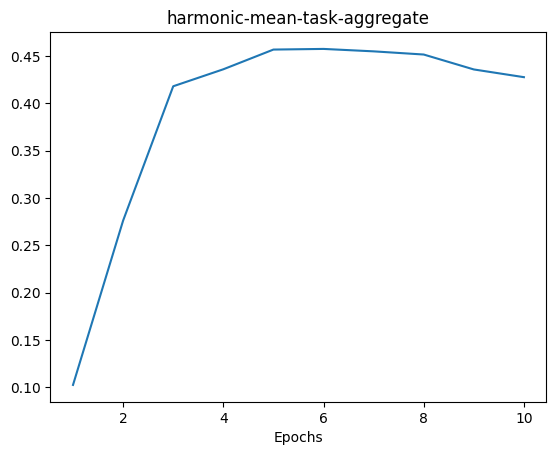

In [41]:
plt.plot(df["harmonic-mean-task-aggregate"])
plt.title("harmonic-mean-task-aggregate")
plt.xlabel("Epochs")

Text(0.5, 0.98, 'General Metrics')

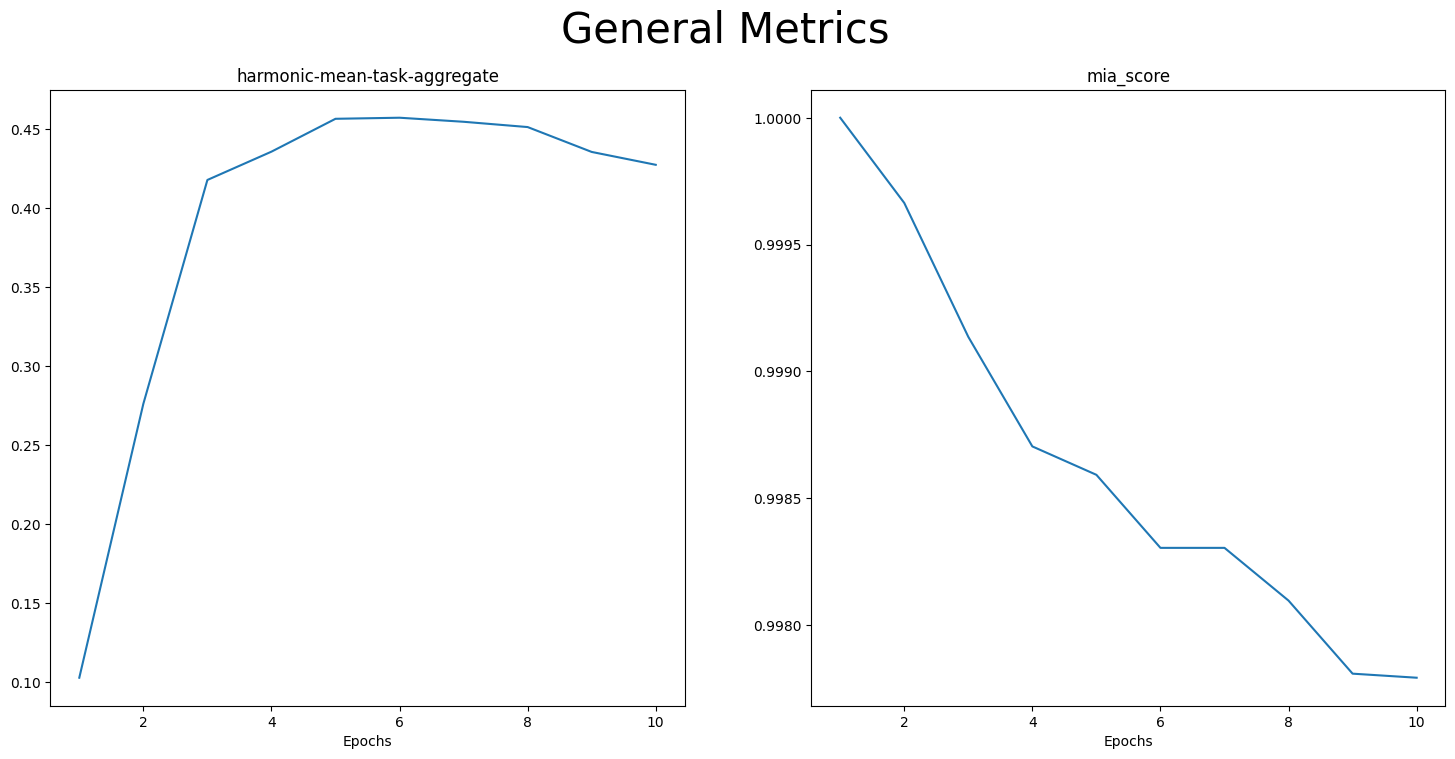

In [55]:
fig,ax=plt.subplots(1,2,figsize=(18,8),sharex=True)
ax[0].plot(df["harmonic-mean-task-aggregate"])
ax[0].title.set_text("harmonic-mean-task-aggregate")
ax[0].set_xlabel("Epochs")
ax[1].plot(df["mia"])
ax[1].title.set_text("mia_score")
ax[1].set_xlabel("Epochs")
fig.suptitle('General Metrics', fontsize=30)




Text(0.5, 0.98, 'Retain Set')

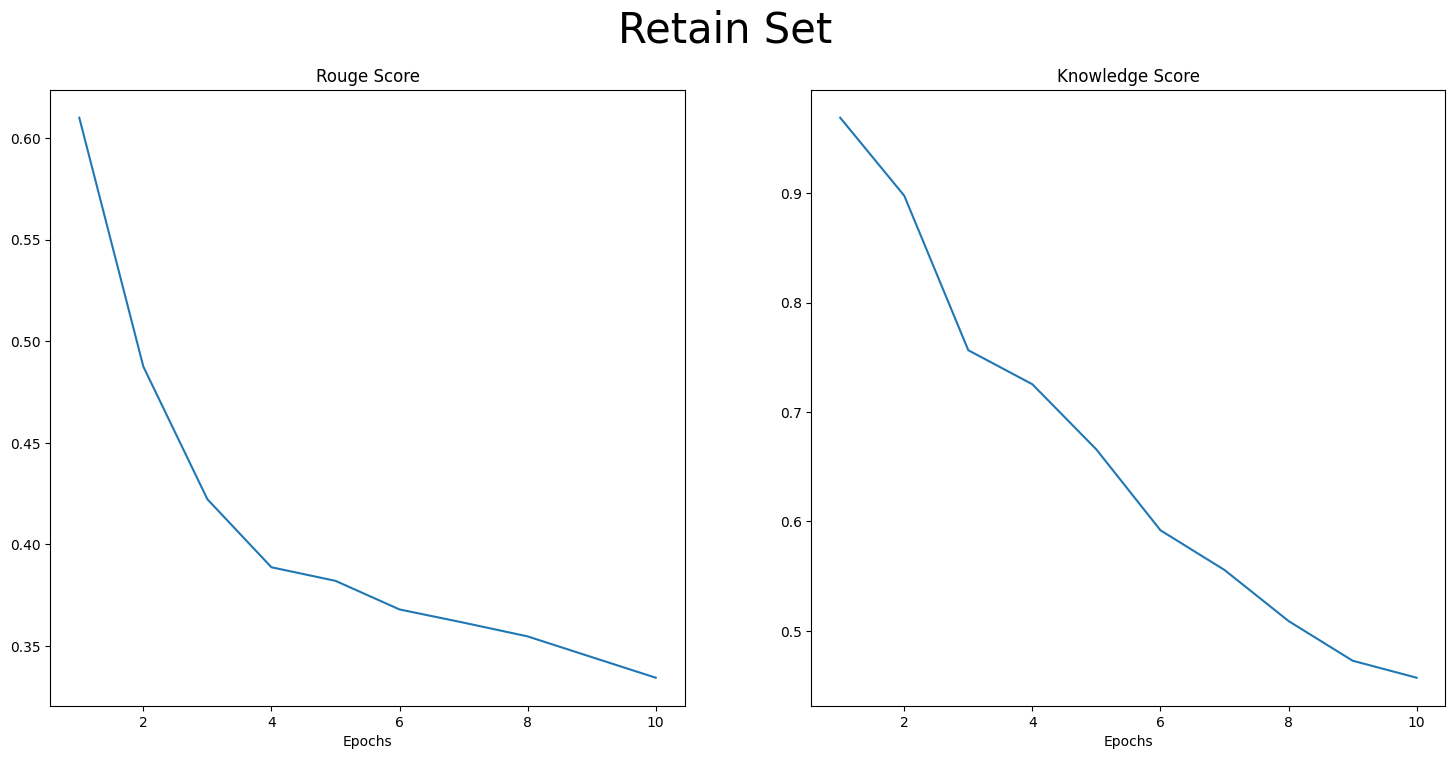

In [56]:
fig,ax=plt.subplots(1,2,figsize=(18,8),sharex=True)
ax[0].plot(df["retain_rouge"])
ax[0].title.set_text("Rouge Score")
ax[0].set_xlabel("Epochs")
ax[1].plot(df["retain_knowledge"])
ax[1].title.set_text("Knowledge Score")
ax[1].set_xlabel("Epochs")
fig.suptitle('Retain Set', fontsize=30)




Text(0.5, 0.98, 'Forget Set')

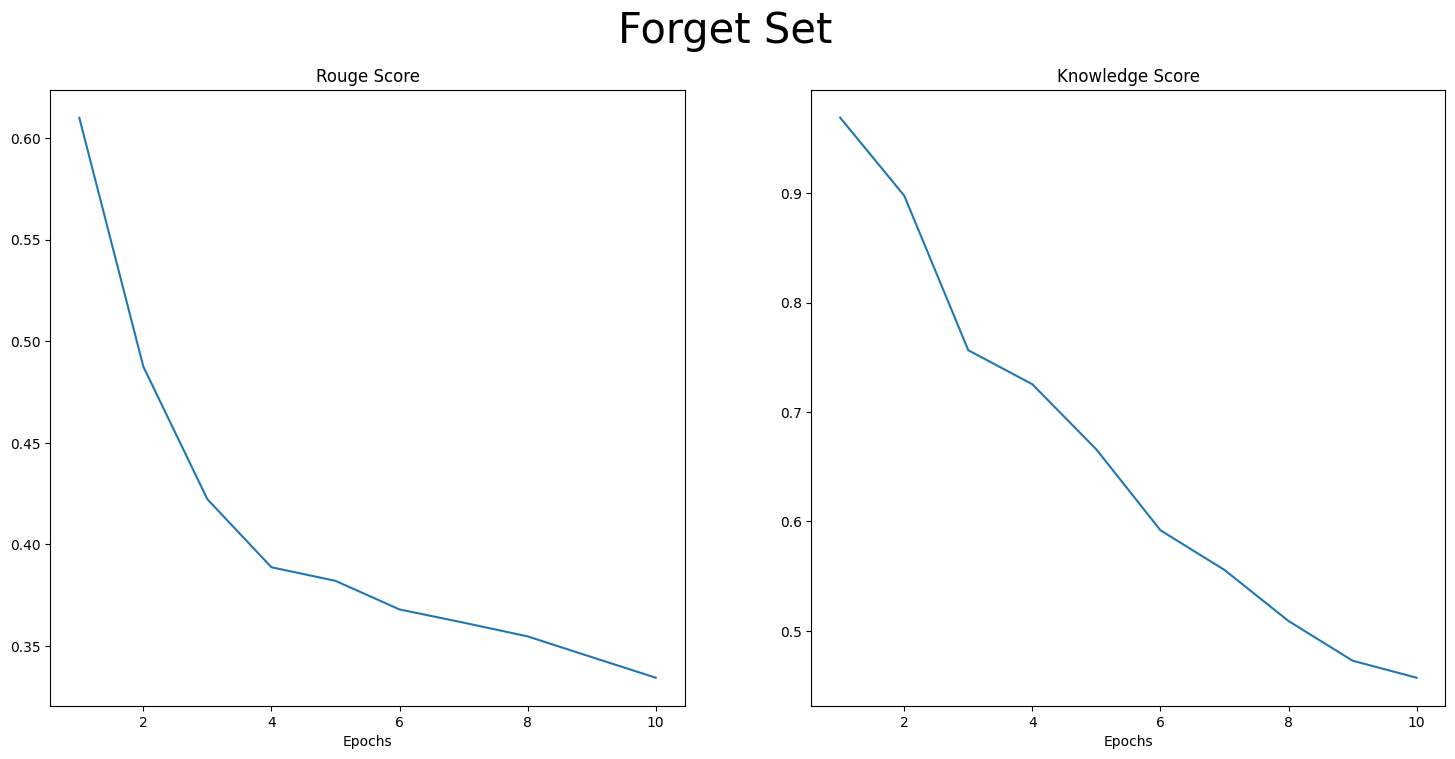

In [57]:
fig,ax=plt.subplots(1,2,figsize=(18,8),sharex=True)
ax[0].plot(df["forget_rouge"])
ax[0].title.set_text("Rouge Score")
ax[0].set_xlabel("Epochs")
ax[1].plot(df["forget_knowledge"])
ax[1].title.set_text("Knowledge Score")
ax[1].set_xlabel("Epochs")
fig.suptitle('Forget Set', fontsize=30)



In [2]:
import json

JSONDecodeError: Extra data: line 2 column 1 (char 1033)

In [18]:
ce_full

{'forget-set': {'overall-regurgitation-score': 0.8310834454434304,
  'overall-knowledge-score': 0.9961139896373057,
  'Task1': {'regurgitation-score': 0.9162641325180857,
   'knowledge-score': 0.9902912621359223},
  'Task2': {'regurgitation-score': 0.9243698457775359,
   'knowledge-score': 0.9980392156862745},
  'Task3': {'regurgitation-score': 0.7160593976272771,
   'knowledge-score': 0.9937106918238994}},
 'retain-set': {'overall-regurgitation-score': 0.8310834454434304,
  'overall-knowledge-score': 0.9961139896373057,
  'Task1': {'regurgitation-score': 0.9162641325180857,
   'knowledge-score': 0.9902912621359223},
  'Task2': {'regurgitation-score': 0.9243698457775359,
   'knowledge-score': 0.9980392156862745},
  'Task3': {'regurgitation-score': 0.7160593976272771,
   'knowledge-score': 0.9937106918238994}},
 'mia_loss_acc': 1.0,
 'aggregated-terms': [0.0837358674819143,
  0.009708737864077666,
  0.07563015422246411,
  0.0019607843137254832,
  0.2839406023727229,
  0.0062893081761006

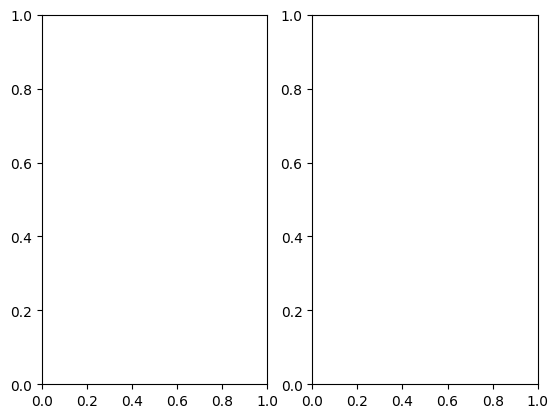

In [ ]:
fig,ax=plt.subplots(1,2)
plt.barplot([ce_full["overall-regurgitation-score'"]])

In [ ]:
fig,ax=

In [3]:
!pip install deepeval

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opentelemetry-exporter-otlp-proto-grpc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 30.3 MB/s eta 0:00:00
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=cea8088f8d1edf4c7970a230cfb9df97e4f099d103cf129ad3a8fd430114f1a9
  Stored in directory: /home/amunis/.cache/pip/wheels/6f/81/48/001bbc0109c15e18c009eee300022f42d1e070e54f1d00b218
Successfully built docx2txt
  Attempting un

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
path = "/data1/malto/unlearning_llm/"
model_path = path + 'models/semeval25-unlearning-model'

model = AutoModelForCausalLM.from_pretrained(model_path+'-1B-model')


/home/amunis/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]


In [8]:
benchmark=MMLU(n_shots=3)

In [5]:
from datasets import load_dataset

ds = load_dataset("cais/mmlu", "all")

In [2]:
def format_question(question, options):
    formatted = f"Question: {question}\nOptions:\n"
    for i, option in enumerate(options):
        formatted += f"{chr(65 + i)}. {option}\n"
    return formatted

In [2]:
def genrate_ex_sentences(model,data,model_type,max_length=300):    
    model.to("cuda")
    if model_type == "7B":
        tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-7B-0724-Instruct-hf")
    elif model_type == "1B":
        tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1B-0724-hf")
    input_ids = tokenizer.encode(data, return_tensors='pt').to("cuda") 
    output = model.generate(input_ids, max_new_tokens=max_length, do_sample=False,  use_cache=True,pad_token_id=tokenizer.eos_token_id)
    
    out=tokenizer.decode(output[0], skip_special_tokens=True)
    return out

In [4]:
import pandas as pd
path = "/data1/malto/unlearning_llm/"

## Fetch and load dataset:
dataset_path = path + 'datasets/semeval25-unlearning-data/'
#snapshot_download(repo_id='llmunlearningsemeval2025organization/semeval25-unlearning-dataset-public', token=hf_token, local_dir=dataset_path, repo_type="dataset")
retain_train_df = pd.read_parquet(dataset_path+'data/retain_train-00000-of-00001.parquet', engine='pyarrow') # Retain split: train set
retain_validation_df = pd.read_parquet(dataset_path+'data/retain_validation-00000-of-00001.parquet', engine='pyarrow') # Retain split: validation set
forget_train_df = pd.read_parquet(dataset_path+'data/forget_train-00000-of-00001.parquet', engine='pyarrow') # Forget split: train set
forget_validation_df = pd.read_parquet(dataset_path+'data/forget_validation-00000-of-00001.parquet', engine='pyarrow') # Forget split: validation set
from transformers import AutoModelForCausalLM, AutoTokenizer

In [5]:
a=genrate_ex_sentences(model,forget_train_df["input"][100],"1B",256)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [6]:
b=f"{forget_train_df["input"][100]} {forget_train_df["output"][100]}"

In [7]:
a==b

True

In [ ]:
b

In [19]:
model.save_pretrained("preunleran_1b")

In [20]:
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-1B-0724-hf")

In [21]:
tokenizer.save_pretrained("preunleran_1b")

('preunleran_1b/tokenizer_config.json',
 'preunleran_1b/special_tokens_map.json',
 'preunleran_1b/tokenizer.json')